## Plotters for the AUTOASSESS

[INFO]  Data folder ./bags/circle_tracking already exists. Not creating.
              Topics                      Types  Message Count     Frequency
0  /flynav/curr_odom          nav_msgs/Odometry           4576  76260.072727
1           /pose_in  geometry_msgs/PoseStamped           7719    200.315400


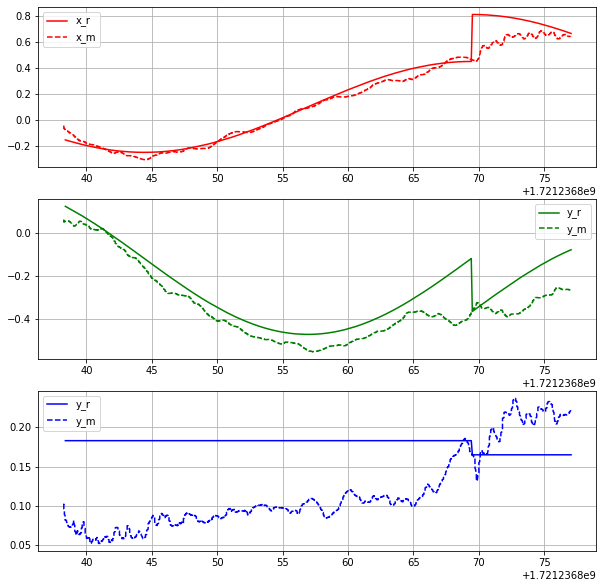

In [24]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt

# Load the bag file
bag = bagreader('./bags/circle_tracking.bag')

# List the available topics in the bag file
print(bag.topic_table)

# Read the specific topic, replace '/poseStamped_topic' with your topic name
pose_data = bag.message_by_topic('/pose_in')
odom_data = bag.message_by_topic('/flynav/curr_odom')

# Load the data into a pandas dataframe
df = pd.read_csv(pose_data)
df_ = pd.read_csv(odom_data)

# Display the dataframe columns to understand what data is available
#print(df.columns)

# Plot the data (for example, plotting position x and y over time)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

ax1.plot(df['Time'], df['pose.position.x'], label='x_r', color='r')
ax1.plot(df_['Time'], df_['pose.pose.position.x'], label='x_m', linestyle='--', color='r')
ax1.legend()
ax1.grid()

ax2.plot(df['Time'], df['pose.position.y'], label='y_r', color='g')
ax2.plot(df_['Time'], df_['pose.pose.position.y'], label='y_m', linestyle='--', color='g')
ax2.legend()
ax2.grid()

ax3.plot(df['Time'], df['pose.position.z'], label='y_r', color='b')
ax3.plot(df_['Time'], df_['pose.pose.position.z'], label='y_m', linestyle='--', color='b')
ax3.legend()
ax3.grid()

## Plotter methods

In [314]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as Rot
from bagpy import bagreader
import numpy as np

def plot_position(bag_path, plot_name=None): 
    
    # Load the bag file
    bag = bagreader(bag_path)

    # Read the specific topic, replace '/poseStamped_topic' with your topic name
    pose_data = bag.message_by_topic('/pose_in')
    odom_data = bag.message_by_topic('/flynav/vio_odom')

    # Load the data into a pandas dataframe
    df = pd.read_csv(pose_data)
    df_ = pd.read_csv(odom_data)

    # Plot the data (for example, plotting position x and y over time)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,6), sharex=True)
    
    # TODO: Add plot title
    ax1.plot(df['Time'], df['pose.position.x'], label='x_r', color='r')
    ax1.plot(df_['Time'], df_['pose.pose.position.x'], label='x_m', linestyle='--', color='r')
    ax1.legend()
    ax1.grid()

    ax2.plot(df['Time'], df['pose.position.y'], label='y_r', color='g')
    ax2.plot(df_['Time'], df_['pose.pose.position.y'], label='y_m', linestyle='--', color='g')
    ax2.legend()
    ax2.grid()

    ax3.plot(df['Time'], df['pose.position.z'], label='y_r', color='b')
    ax3.plot(df_['Time'], df_['pose.pose.position.z'], label='y_m', linestyle='--', color='b')
    ax3.legend()
    ax3.grid()  
    if plot_name:
        fig.savefig(f'{plot_name}.png')
    
def plot_odometries(bag_path, plot_name=None): 
    
    bag = bagreader(bag_path)
    
    odom1_data = bag.message_by_topic('/flynav/vio_odom')
    odom2_data = bag.message_by_topic('/kalman_scan2map_node/odometry_ros')
    
    df1 = pd.read_csv(odom1_data)
    df2 = pd.read_csv(odom2_data)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    ax1.plot(df1['Time'], df1['pose.pose.position.x'], label='xv', color='r')
    ax1.plot(df2['Time'], df2['pose.pose.position.x'], label='xf', linestyle='--', color='r')
    ax1.legend()
    ax1.grid()
    
    ax2.plot(df1['Time'], df1['pose.pose.position.y'], label='yv', color='g')
    ax2.plot(df2['Time'], df2['pose.pose.position.y'], label='yf', linestyle='--',color='g')
    ax2.legend()
    ax2.grid()
    
    ax3.plot(df1['Time'], df1['pose.pose.position.z'], label='zv', color='b')
    ax3.plot(df2['Time'], df2['pose.pose.position.z'], label='zf', linestyle='--',color='b')
    ax3.legend()
    ax3.grid()
    if plot_name:
        fig.savefig(f'{plot_name}.png')
    
def plot_opti_position(bag_path, plot_name=None): 
    # Load the bag file
    bag = bagreader(bag_path)

    # Read the specific topics
    pose_ee = bag.message_by_topic('/mocap_helper/opt_elios_pose')
    pose_uav = bag.message_by_topic('/mocap_helper/opt_ee_pose')

    # Load the data into pandas dataframes
    df_ee = pd.read_csv(pose_ee)
    df_uav = pd.read_csv(pose_uav)

    # Plot the data (for example, plotting position x, y, and z over time)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 4))
    
    ax1.plot(df_uav['Time'], df_uav['pose.position.x'], label='x_uav', color='r')
    ax1.plot(df_ee['Time'], df_ee['pose.position.x'], label='x_ee', linestyle='--', color='r')
    ax1.legend()
    ax1.grid()

    ax2.plot(df_uav['Time'], df_uav['pose.position.y'], label='y_uav', color='g')
    ax2.plot(df_ee['Time'], df_ee['pose.position.y'], label='y_ee', linestyle='--', color='g')
    ax2.legend()
    ax2.grid()

    ax3.plot(df_uav['Time'], df_uav['pose.position.z'], label='z_uav', color='b')
    ax3.plot(df_ee['Time'], df_ee['pose.position.z'], label='z_ee', linestyle='--', color='b')
    ax3.legend()
    ax3.grid()

    plt.show()
    if plot_name: 
        fig.savefig(f'{plot_name}.png')
    
def plot_opti_position_and_estimate(bag_path, T_, plot_name=None): 
    # Load the bag file
    bag = bagreader(bag_path)

    # Read the specific topics
    pose_ee = bag.message_by_topic('/mocap_helper/opt_elios_pose')
    pose_uav = bag.message_by_topic('/mocap_helper/opt_ee_pose')

    # Load the data into pandas dataframes
    df_ee = pd.read_csv(pose_ee)
    df_uav = pd.read_csv(pose_uav)
    
    x,y,z,qx,qy,qz,qw = extract_odom(df_uav)
    T_uav = create_T_list(x, y, z, qx, qy, qz, qw)
    x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee = extract_odom(df_ee)
    newT_ = []
    for T in T_uav:
        newT = np.matmul(T, np.linalg.inv(T_))
        newT_.append(newT)
        
    x_ = [T_[0, 3] for T_ in newT_]
    y_ = [T_[1, 3] for T_ in newT_]
    z_ = [T_[2, 3] for T_ in newT_] 

    # Plot the data (for example, plotting position x, y, and z over time)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    ax1.plot(df_uav['Time'], df_uav['pose.position.x'], label='x_uav', color='r')
    ax1.plot(df_ee['Time'], df_ee['pose.position.x'], label='x_ee', linestyle='--', color='r')
    ax1.plot(df_uav['Time'], x_, label='x_est')
    ax1.legend()
    ax1.grid()

    ax2.plot(df_uav['Time'], df_uav['pose.position.y'], label='y_uav', color='g')
    ax2.plot(df_ee['Time'], df_ee['pose.position.y'], label='y_ee', linestyle='--', color='g')
    ax2.plot(df_uav['Time'], y_, label='y_est')
    ax2.legend()
    ax2.grid()

    ax3.plot(df_uav['Time'], df_uav['pose.position.z'], label='z_uav', color='b')
    ax3.plot(df_ee['Time'], df_ee['pose.position.z'], label='z_ee', linestyle='--', color='b')
    ax3.plot(df_uav['Time'], z_, label='z_est')
    ax3.legend()
    ax3.grid()

    if plot_name: 
        plt.savefig(f'{plot_name}.png')
    plt.show()
    
def plot_opti_3d():  

    # Create a 3D scatter plot
    fig_3d = plt.figure(figsize=(10, 10))
    ax_3d = fig_3d.add_subplot(111, projection='3d')

    ax_3d.scatter(df_uav['pose.position.x'], df_uav['pose.position.y'], df_uav['pose.position.z'], c='r', label='uav')
    ax_3d.scatter(df_ee['pose.position.x'], df_ee['pose.position.y'], df_ee['pose.position.z'], c='b', label='ee')

    ax_3d.set_xlabel('X Position')
    ax_3d.set_ylabel('Y Position')
    ax_3d.set_zlabel('Z Position')
    ax_3d.legend()
    ax_3d.grid()
    
def plot_p(x, y, z):
    plt.figure(figsize=(10, 4))
    
    # Plot x, y, z
    plt.plot(x, color='red', label='x position')
    plt.plot(y, color='green', label='y position')
    plt.plot(z, color='blue', label='z position')
    
    # Add grid
    plt.grid(True)
    
    # Add labels and title
    plt.xlabel('Time (or Index)')
    plt.ylabel('Position')
    plt.title('Position vs. Time/Index')
    
    # Add legend
    plt.legend()
    
    # Show plot
    plt.show()
    
def plot_rot(T):
    roll_, pitch_, yaw_ = [], [], []
    for T_ in T: 
        R = T_[:3, :3]
        r =  Rot.from_matrix(R)
        angles = r.as_euler("zyx", degrees=False)
        roll_.append(angles[2])
        pitch_.append(angles[1])
        yaw_.append(angles[0])
    plt.figure(figsize=(10, 4))
    plt.plot(roll_, label='roll', color='r')
    plt.plot(pitch_, label='pitch', color='g')
    plt.plot(yaw_, label='yaw', color='b')
    # Add labels and title
    plt.xlabel('Sample')
    plt.ylabel('Angle')
    plt.title('Roll, pitch, and yaw vs time')
    plt.legend()
    plt.grid()
    
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def plot_rmse_and_stats(df_ee, x_rmse, y_rmse, z_rmse, n=0):
    """
    Plots RMSE over time in a 3x2 grid. The first column contains line plots of 
    RMSE values, and the second column contains bar charts displaying the mean 
    and standard deviation of these RMSE values.

    The second column is narrower, with a 3:1 width ratio compared to the first column.
    
    Parameters:
    - df_ee: DataFrame containing the 'Time' column.
    - x_rmse, y_rmse, z_rmse: Arrays or lists containing RMSE values for x, y, and z axes.
    - n: Starting index for plotting (default is 0).
    """
    # Create a figure with custom GridSpec to control column widths
    fig = plt.figure(figsize=(14, 12))
    gs = GridSpec(3, 2, width_ratios=[3, 1], figure=fig)

    # First row: x_rmse line plot
    x_max = np.max(x_rmse)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(df_ee['Time'][n:], x_rmse, label='x_rmse', color='red')
    ax1.set_title(f'x_rmse vs Time (Max: {x_max:.2f})')
    ax1.grid(True)
    ax1.legend()

    # First row: x_rmse bar chart with mean and std deviation
    x_mean = np.mean(x_rmse)
    x_std = np.std(x_rmse)
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.bar(['Mean'], [x_mean], yerr=[x_std], color='red', capsize=5)
    ax2.set_title(f'x_rmse mean/dev')
    ax2.set_ylim([0, x_max * 1.1])

    # Second row: y_rmse line plot
    y_max = np.max(y_rmse)
    ax3 = fig.add_subplot(gs[1, 0])
    ax3.plot(df_ee['Time'][n:], y_rmse, label='y_rmse', color='green')
    ax3.set_title(f'y_rmse vs Time (Max: {y_max:.2f})')
    ax3.grid(True)
    ax3.legend()

    # Second row: y_rmse bar chart with mean and std deviation
    y_mean = np.mean(y_rmse)
    y_std = np.std(y_rmse)
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.bar(['Mean'], [y_mean], yerr=[y_std], color='green', capsize=5)
    ax4.set_title(f'y_rmse mean/dev')
    ax4.set_ylim([0, y_max * 1.1])

    # Third row: z_rmse line plot
    z_max = np.max(z_rmse)
    ax5 = fig.add_subplot(gs[2, 0])
    ax5.plot(df_ee['Time'][n:], z_rmse, label='z_rmse', color='blue')
    ax5.set_title(f'z_rmse vs Time (Max: {z_max:.2f})')
    ax5.grid(True)
    ax5.legend()

    # Third row: z_rmse bar chart with mean and std deviation
    z_mean = np.mean(z_rmse)
    z_std = np.std(z_rmse)
    ax6 = fig.add_subplot(gs[2, 1])
    ax6.bar(['Mean'], [z_mean], yerr=[z_std], color='blue', capsize=5)
    ax6.set_title(f'z_rmse mean/dev')
    ax6.set_ylim([0, z_max * 1.1])

    # Overall title for the entire figure
    fig.suptitle('RMSE p_ee vs p_est and Statistical Summary', fontsize=16)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Show the plot
    plt.savefig('estimate_rms_ee.png')
    plt.show()
    
def plot_pos_acc(df_pos_uav, df_acc_uav, t_end=None): 
    
    t = df_acc_uav['Time']
    t = scale_time(t)
    ax = df_acc_uav['acceleration_semibody.x']
    ay = df_acc_uav['acceleration_semibody.y']
    az = df_acc_uav['acceleration_semibody.z']
    yawrate = df_acc_uav['yaw_rate_body']
    t_, x, y, z, qx, qy, qz, qw = extract_nav_odom(df_pos_uav)
    t_ = scale_time(t_)

    if t_end:
        it_ = find_closest_index(t, t_end); t_ = t_[:it_]; x=x[:it_]; y=y[:it_]; z=z[:it_]
        it = find_closest_index(t, t_end); t = t[:it]; ax = ax[:it]; ay = ay[:it]; az = az[:it]

    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(8, 8), sharex=True)
    ax1.plot(t_, x, color='red')
    ax1.grid()
    ax1.set_xlim(0, max(t_))
    ax2.plot(t, ax, color='red')
    ax2.grid()
    ax2.set_xlim(0, max(t_))
    ax3.plot(t_, y, color='green')
    ax3.grid()
    ax3.set_xlim(0, max(t_))
    ax4.plot(t, ay, color='green')
    ax4.grid()
    ax4.set_xlim(0, max(t_))
    ax5.plot(t_, z, color='blue')
    ax5.grid()
    ax6.plot(t, az-10.81, color='blue')
    ax6.grid()
    
def plot_pos_acc_imu(df_pos_uav, df_acc_uav, df_imu, t_end=None): 
    
    t = df_acc_uav['Time']
    t = scale_time(t)
    ax = df_acc_uav['acceleration_semibody.x']
    ay = df_acc_uav['acceleration_semibody.y']
    az = df_acc_uav['acceleration_semibody.z']
    tm = df_imu['Time']
    tm = scale_time(tm)
    ax_m = df_imu['linear_acceleration.x']
    ay_m = df_imu['linear_acceleration.y']
    az_m = df_imu['linear_acceleration.z']
    
    yawrate = df_acc_uav['yaw_rate_body']
    t_, x, y, z, qx, qy, qz, qw = extract_nav_odom(df_pos_uav)
    t_ = scale_time(t_)

    if t_end:
        it_ = find_closest_index(t, t_end); t_ = t_[:it_]; x=x[:it_]; y=y[:it_]; z=z[:it_]
        it = find_closest_index(t, t_end); t = t[:it]; ax = ax[:it]; ay = ay[:it]; az = az[:it]

    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(8, 8), sharex=True)
    ax1.plot(t_, x, color='red')
    ax1.grid()
    ax1.set_xlim(0, max(t_))
    ax2.plot(t, ax, color='red')
    ax2.plot(tm, ax_m, color='red', linestyle='--', linewidth=0.2)
    ax2.grid()
    ax2.set_xlim(0, max(t_))
    ax3.plot(t_, y, color='green')
    ax3.grid()
    ax3.set_xlim(0, max(t_))
    ax4.plot(t, ay, color='green')
    ax4.plot(tm, ay_m, color='green', linestyle='--', linewidth=0.2)
    ax4.grid()
    ax4.set_xlim(0, max(t_))
    ax5.plot(t_, z, color='blue')
    ax5.grid()
    ax6.plot(t, az-10.81, color='blue')
    ax6.plot(tm, az_m, color='blue', linestyle='--', linewidth=0.2)
    ax6.grid()
    
def plot_acc(df_acc_uav, df_imu, t_end): 
    t = df_acc_uav['Time']
    t = scale_time(t)
    ax = df_acc_uav['acceleration_semibody.x']
    ay = df_acc_uav['acceleration_semibody.y']
    az = df_acc_uav['acceleration_semibody.z']
    tm = df_imu['Time']
    tm = scale_time(tm)
    ax_m = df_imu['linear_acceleration.x']
    ay_m = df_imu['linear_acceleration.y']
    az_m = df_imu['linear_acceleration.z']
    
    if t_end:
        it = find_closest_index(t, t_end); t = t[:it_]; ax=ax[:it_]; ay=ay[:it_]; az=az[:it_]
        itm = find_closest_index(tm, t_end); tm = tm[:itm]; ax_m = ax_m[:itm]; ay_m = ay_m[:itm]; az_m = az_m[:itm]
        
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
    ax1.plot(t, ax, color='red')
    ax1.plot(tm, ax_m, color='red', linestyle='--', linewidth=0.2)
    ax1.grid()
    ax1.set_xlim(0, max(t_))
    ax2.plot(t, ay, color='green')
    ax2.plot(tm, ay_m, color='green', linestyle='--', linewidth=0.2)
    ax2.grid()
    ax2.set_xlim(0, max(t_))
    ax3.plot(t, az-10.81, color='blue')
    ax3.plot(tm, az_m-10.81, color='blue', linestyle='--', linewidth=0.2)
    ax3.grid()

## Extractors

In [273]:
def extract_odom(odom): 
    x = odom['pose.position.x']
    y = odom['pose.position.y']
    z = odom['pose.position.z']
    qx = odom['pose.orientation.x']
    qy = odom['pose.orientation.y']
    qz = odom['pose.orientation.z']
    qw = odom['pose.orientation.w']
    return x,y,z,qx,qy,qz,qw

def extract_nav_odom(nav_odom): 
    t = nav_odom['Time']
    x = nav_odom['pose.pose.position.x']
    y = nav_odom['pose.pose.position.y']
    z = nav_odom['pose.pose.position.z']
    qx = nav_odom['pose.pose.orientation.x']
    qy = nav_odom['pose.pose.orientation.y']
    qz = nav_odom['pose.pose.orientation.z']
    qw = nav_odom['pose.pose.orientation.w']
    return t, x,y,z,qx,qy,qz,qw

## Transformation matrices

Pose of the elios in the world (optitrack frame is described as): 
$$T_{W}^{B} $$

Pose of the end effector in the world frame is described as: 
$$T_{W}^{ee}$$

Pose of the end effector in the base frame is described as: 
$$T_{B}^{ee} = T_{B}^{W}T_{W}^{ee} = (T_{W}^{B})^{-1}T_{W}^{ee}$$ 

In [274]:
# Convert quaternion to the rotational matrix
def quat2rot(q):
    
    x, y, z, w = q
    r = Rot.from_quat([x, y, z, w])
    return r.as_matrix()

def get_yaw_from_rotation_matrix(R):
    """
    Extract the yaw angle from a 3x3 rotation matrix.
    
    Parameters:
    R -- A 3x3 numpy array representing the rotation matrix.
    
    Returns:
    Yaw angle in radians.
    """
    # Extract elements from the rotation matrix
    R11 = R[0, 0]
    R21 = R[1, 0]
    
    # Compute the yaw angle
    yaw = np.arctan2(R21, R11)
    
    return yaw

# Convert extracted odometry to the T
def convT(x,y,z,qx,qy,qz,qw): 
    R = quat2rot((qx, qy, qz, qw))
    p = np.array([x, y, z]).reshape(3, 1)
    T = np.hstack((R, p))
    T = np.vstack((T, np.array([0, 0, 0, 1])))
    return T

# Create list from T
def create_T_list(x, y, z, qx, qy, qz, qw):
    T_list = []
    for x_,y_,z_,qx_,qy_,qz_,qw_ in zip(x,y,z,qx,qy,qz,qw): 
        T_ = convT(x_,y_,z_, qx_,qy_,qz_,qw_)
        T_list.append(T_)
    return T_list

# Invert Ts in the list
def inv_T_list(T_list): 
    invT = []
    for T_ in T_list: 
        invT.append(np.linalg.inv(T_))
    return invT

# Calibrate end effector 
def calibrate_ee(T_uav, T_ee):
    T_list = []
    for T, T_inv in zip(T_ee, inv_T_list(T_uav)):
        T_mut = np.matmul(T_inv, T)
        T_new = np.round(T_mut, 4)
        T_list.append(T_new)
    return T_list

# Load the bag file [Create T_uav, T_ee, and T_calib] lists
def get_Ts(bag_pth): 
    bag = bagreader(bag_pth)

    # Read the specific topic, replace '/poseStamped_topic' with your topic name
    pose_uav = bag.message_by_topic('/mocap_helper/opt_elios_pose')
    pose_ee = bag.message_by_topic('/mocap_helper/opt_ee_pose')
    df_uav = pd.read_csv(pose_uav)
    df_ee = pd.read_csv(pose_ee)

    x,y,z,qx,qy,qz,qw = extract_odom(df_uav)
    x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee = extract_odom(df_ee)

    T_uav = create_T_list(x, y, z, qx, qy, qz, qw)
    T_ee = create_T_list(x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee)
    T_calib = calibrate_ee(T_uav, T_ee)
    return T_uav, T_ee, T_calib

# Rotation matrices average 
def avg_T(T_calib): 
    x_ = [T_[0, 3] for T_ in T_calib]
    y_ = [T_[1, 3] for T_ in T_calib]
    z_ = [T_[2, 3] for T_ in T_calib]
    plot_p(x_, y_, z_)

    x_mean = np.mean(x_)
    y_mean = np.mean(y_)
    z_mean = np.mean(z_)
    p_mean = np.array([x_mean, y_mean, z_mean]).reshape(3, 1)

    T_calib_ = np.hstack((np.eye(3), p_mean))
    T_calib_ = np.vstack((T_calib_, [0, 0, 0, 1]))
    return T_calib_

def get_est(T_uav, T_): 
    newT_ = []
    for Tu in T_uav:
        newT = np.matmul(Tu, T_)
        newT_.append(newT)
        
    x_ = [T_[0, 3] for T_ in newT_]
    y_ = [T_[1, 3] for T_ in newT_]
    z_ = [T_[2, 3] for T_ in newT_] 
    
    return x_, y_, z_

## UTILS


In [287]:
def rmse(x_ee, x_est): 
    return [np.sqrt((x_ - x_est_)**2) for x_, x_est_ in zip(x_ee.to_list(), x_est)]
    
def er_diff(x_ee, x_est): 
    return [(x_ - x_est_) for x_, x_est_ in zip(x_ee.to_list(), x_est)]

def find_closest_index(lst, target):
    # Calculate the difference between each element and the target
    differences = [abs(x - target) for x in lst]
    # Find the index of the smallest difference
    closest_index = differences.index(min(differences))
    return closest_index

def scale_time(time):
    new_t = time-time[0]
    return new_t

[INFO]  Data folder ./bags/ground_effect already exists. Not creating.


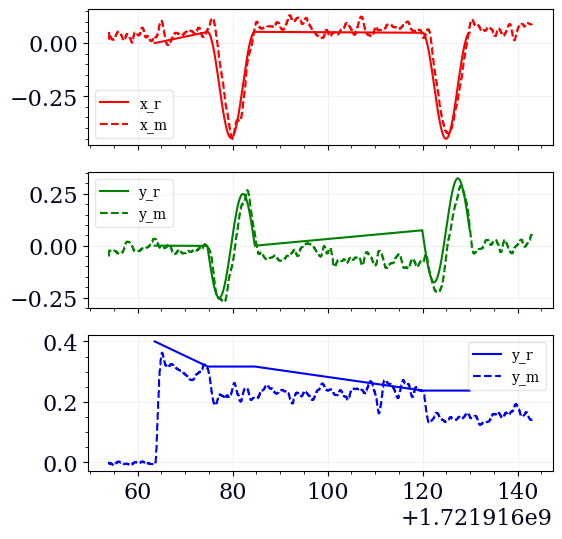

In [280]:
plot_position('./bags/ground_effect.bag', "ground_effect")

## Comments and observations: 

No I term currently. Rope can induce disturbance. Ground effect can induce dusturbance. 


[INFO]  Data folder ./bags/square_circle already exists. Not creating.
[INFO]  Data folder ./bags/square_circle already exists. Not creating.


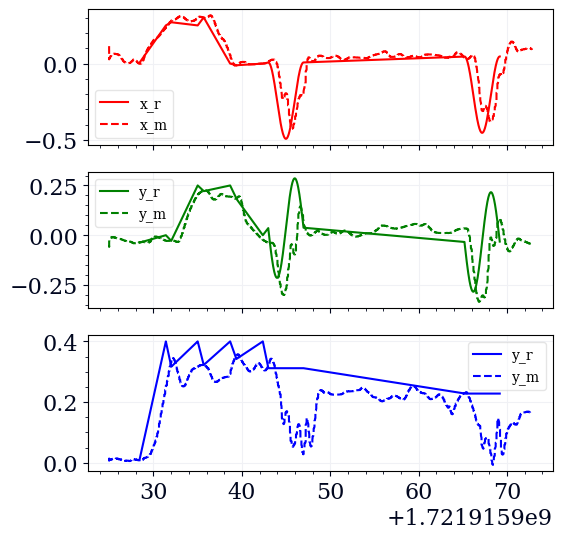

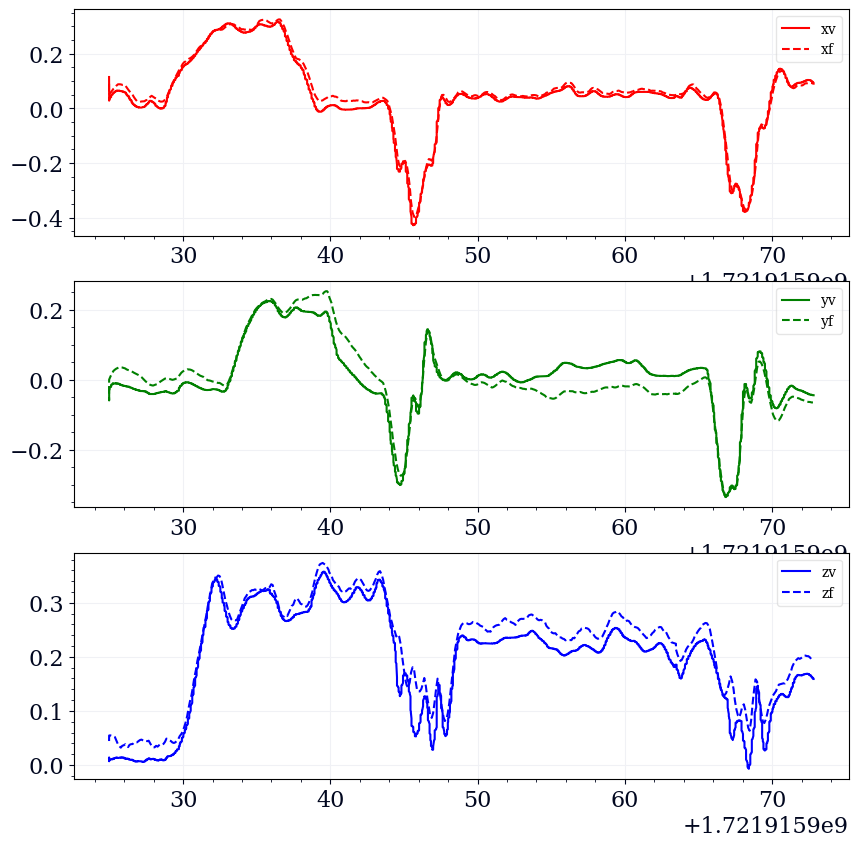

In [281]:
plot_position('./bags/square_circle.bag', 'square_circle')
plot_odometries('./bags/square_circle.bag', 'compare_odometries')

[INFO]  Data folder ./bags/ground_effect already exists. Not creating.
[INFO]  Data folder ./bags/ground_effect already exists. Not creating.


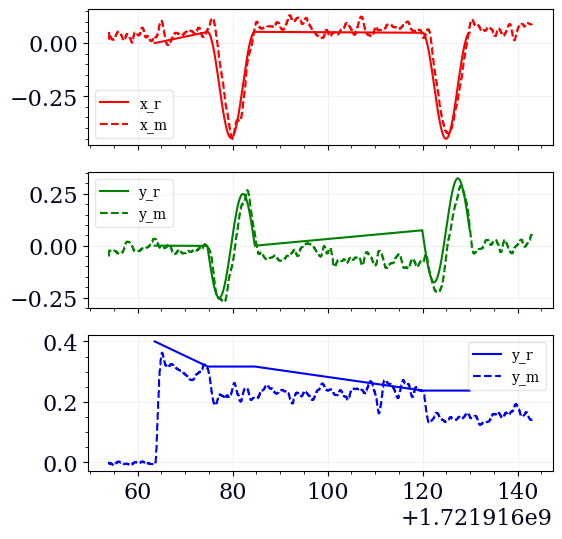

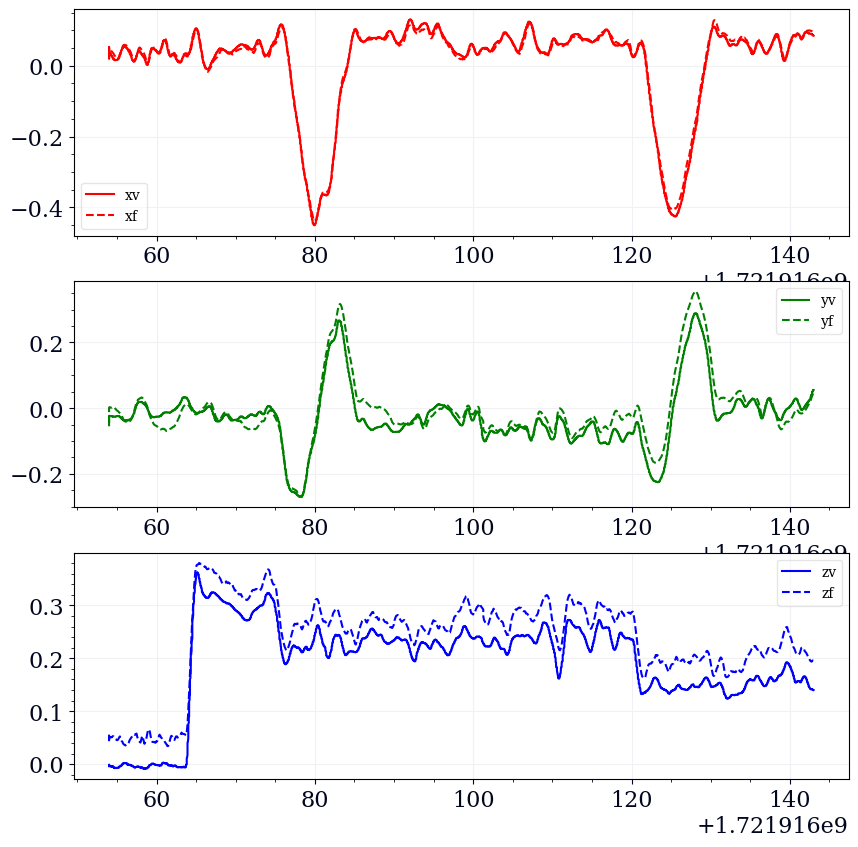

In [282]:
plot_position('./bags/ground_effect.bag')
plot_odometries('./bags/ground_effect.bag')

[INFO]  Data folder ./bags/aerial_manip already exists. Not creating.


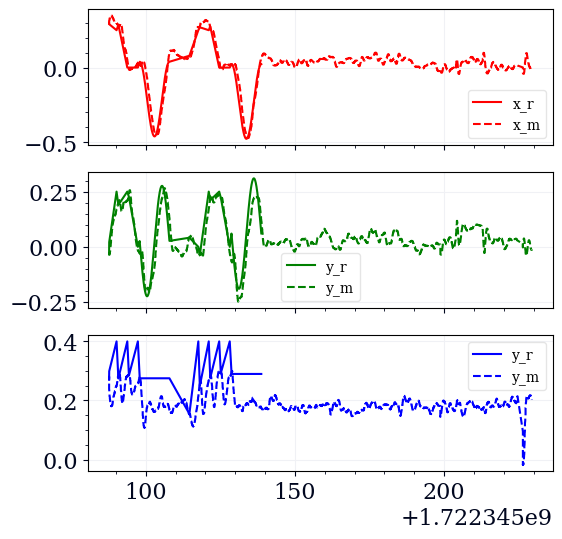

In [283]:
plot_position('./bags/aerial_manip.bag')


[INFO]  Data folder ./bags/mocap1 already exists. Not creating.


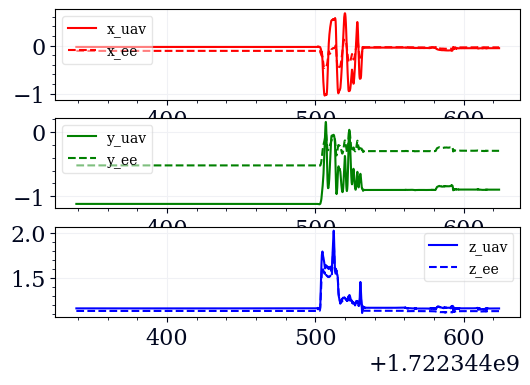

[INFO]  Data folder ./bags/mocap2 already exists. Not creating.


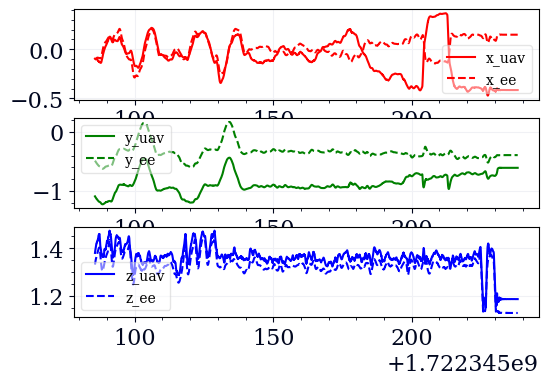

[INFO]  Data folder ./bags/mocap3 already exists. Not creating.


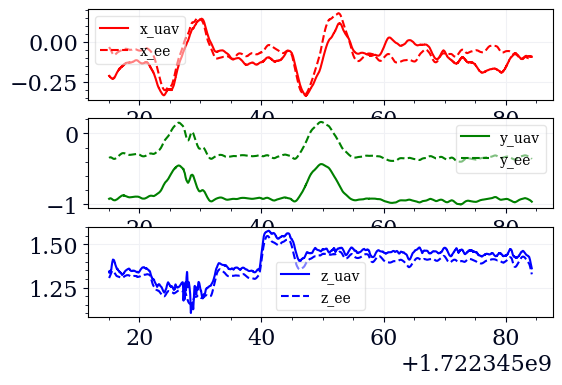

In [284]:
plot_opti_position('./bags/mocap1.bag', 'mocap1')
plot_opti_position('./bags/mocap2.bag', 'mocap2')
plot_opti_position('./bags/mocap3.bag', 'mocap3')

## Few operational problems: 

- Optitrack and Flyability are on the same network, hence it is hard to collect and use data simultaneously
- T_ee_B changes depending on the measurements because of the optitrack collection routine, now it should be fine :)



[INFO]  Data folder ./bags/mocap6_rotation already exists. Not creating.
[INFO]  Data folder ./bags/mocap6_rotation already exists. Not creating.


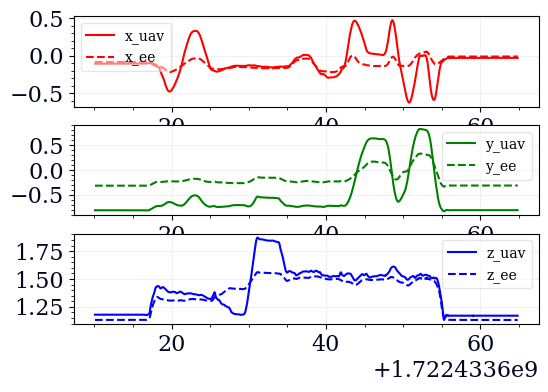

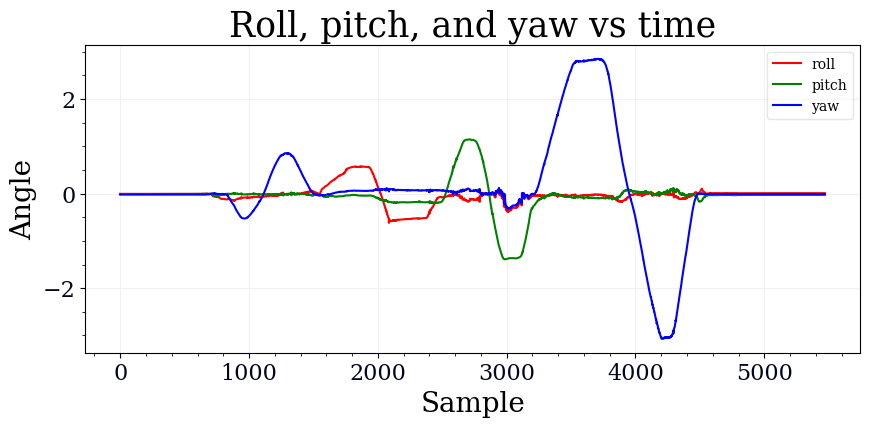

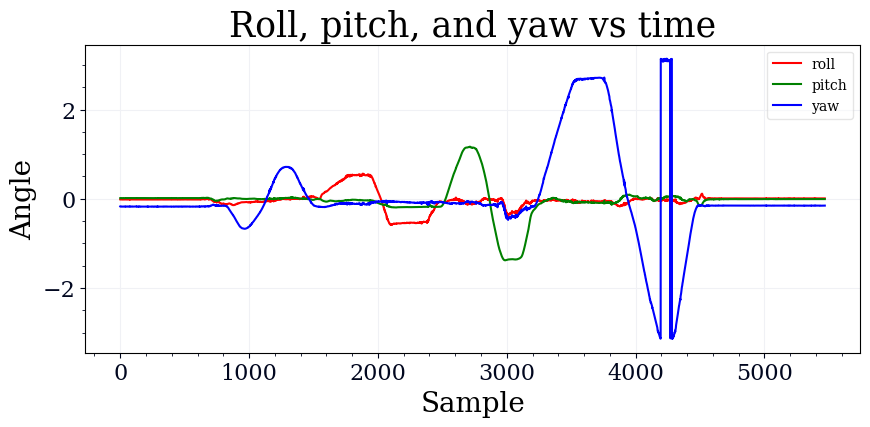

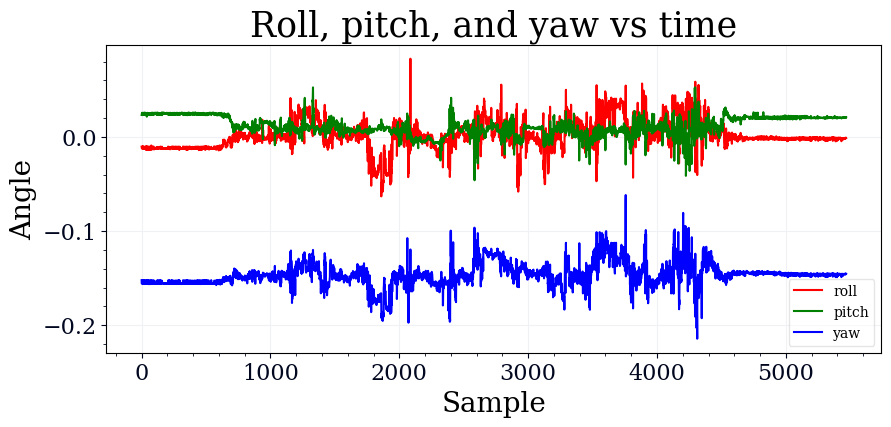

In [285]:
#plot_odometries('./bags/aerial_manip.bag')
T_uav, T_ee, T_calib = get_Ts('./bags/mocap6_rotation.bag')
plot_opti_position('./bags/mocap6_rotation.bag')
plot_rot(T_uav)
plot_rot(T_ee)
plot_rot(T_calib)

#plot_opti_position('./bags/mocap2.bag')
#plot_p(x_, y_, z_)

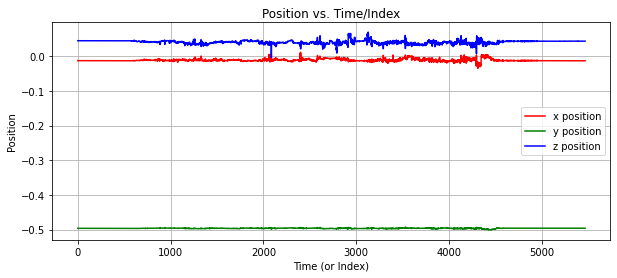

[[ 1.          0.          0.         -0.01116021]
 [ 0.          1.          0.         -0.49647354]
 [ 0.          0.          1.          0.04106445]
 [ 0.          0.          0.          1.        ]]
[INFO]  Data folder ./bags/mocap6_rotation already exists. Not creating.


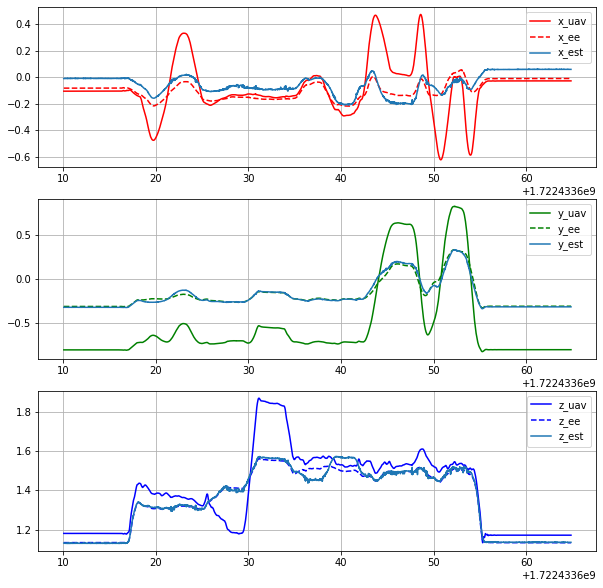

In [42]:
x_ = [T_[0, 3] for T_ in T_calib]
y_ = [T_[1, 3] for T_ in T_calib]
z_ = [T_[2, 3] for T_ in T_calib]
plot_p(x_, y_, z_)

x_mean = np.mean(x_)
y_mean = np.mean(y_)
z_mean = np.mean(z_)
p_mean = np.array([x_mean, y_mean, z_mean]).reshape(3, 1)

T_calib_ = np.hstack((np.eye(3), p_mean))
T_calib_ = np.vstack((T_calib_, [0, 0, 0, 1]))
print(T_calib_)

plot_opti_position_and_estimate('./bags/mocap6_rotation.bag', T_calib_, 'mocap_calib')

## TODO: 
- [x] Compare estimated T with one I have, and make sure it is correct :) it is correct but we need to minimize it :)  
- [ ] Put it in overleaf
- [ ] Clip 
- [ ] Scale time
- [ ] Optimization of the found matrices (across some time horizon) 

## Explore bags

In [ ]:
import os
os.listdir("./bags")

In [ ]:
plot_odometries('./bags/mocap_hend_uav.bag')


In [ ]:
T_calib = getTcalib('./bags/mocap_hand.bag')

## Averaging rotation matrice: 

- https://www.mathworks.com/matlabcentral/answers/1996053-averaging-rotation-matrices-and-calculating-the-variability
- https://mtaylor.web.unc.edu/wp-content/uploads/sites/16915/2018/04/RAVG.pdf

In [ ]:
plot_opti_position_and_estimate('./bags/mocap_hand.bag', T_calib_)

[INFO]  Data folder ./bags/hand_mocap_comparison already exists. Not creating.


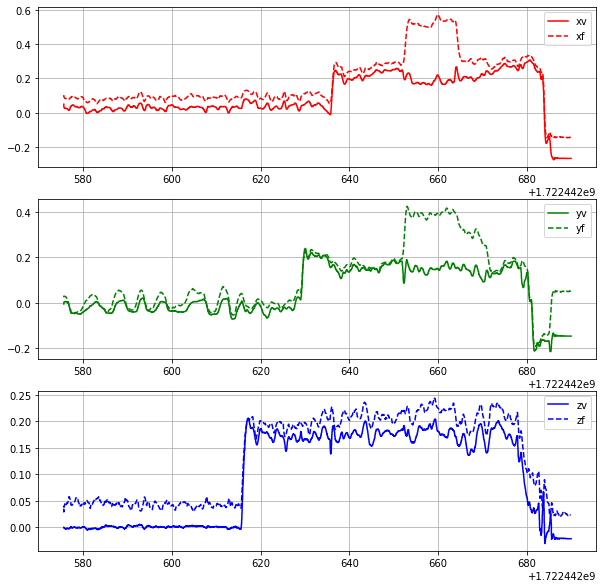

In [194]:
plot_odometries('./bags/hand_mocap_comparison.bag')

[INFO]  Data folder ./bags/hand_mocap_comparison_opti already exists. Not creating.


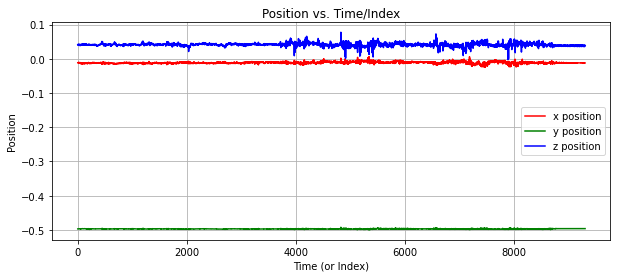

[INFO]  Data folder ./bags/hand_mocap_comparison_opti already exists. Not creating.


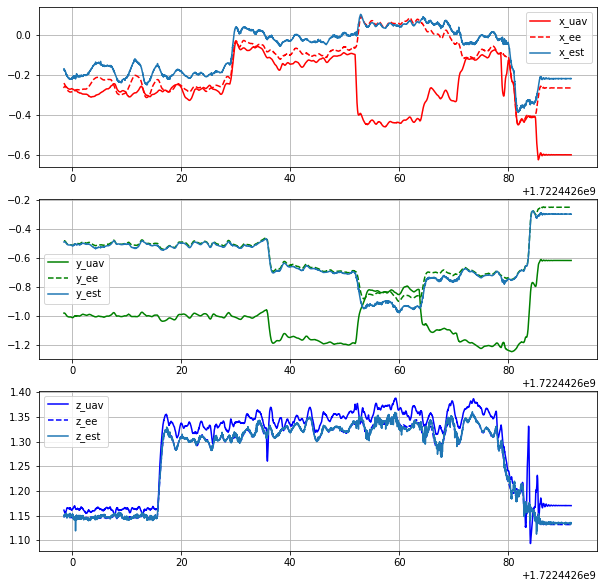

In [189]:
T_uav, T_ee, T_calib_ = get_Ts('./bags/hand_mocap_comparison_opti.bag')
T_calib = avg_T(T_calib_)
plot_opti_position_and_estimate('./bags/hand_mocap_comparison_opti.bag', T_calib)

[INFO]  Data folder ./bags/hand_mocap_comparison_opti already exists. Not creating.


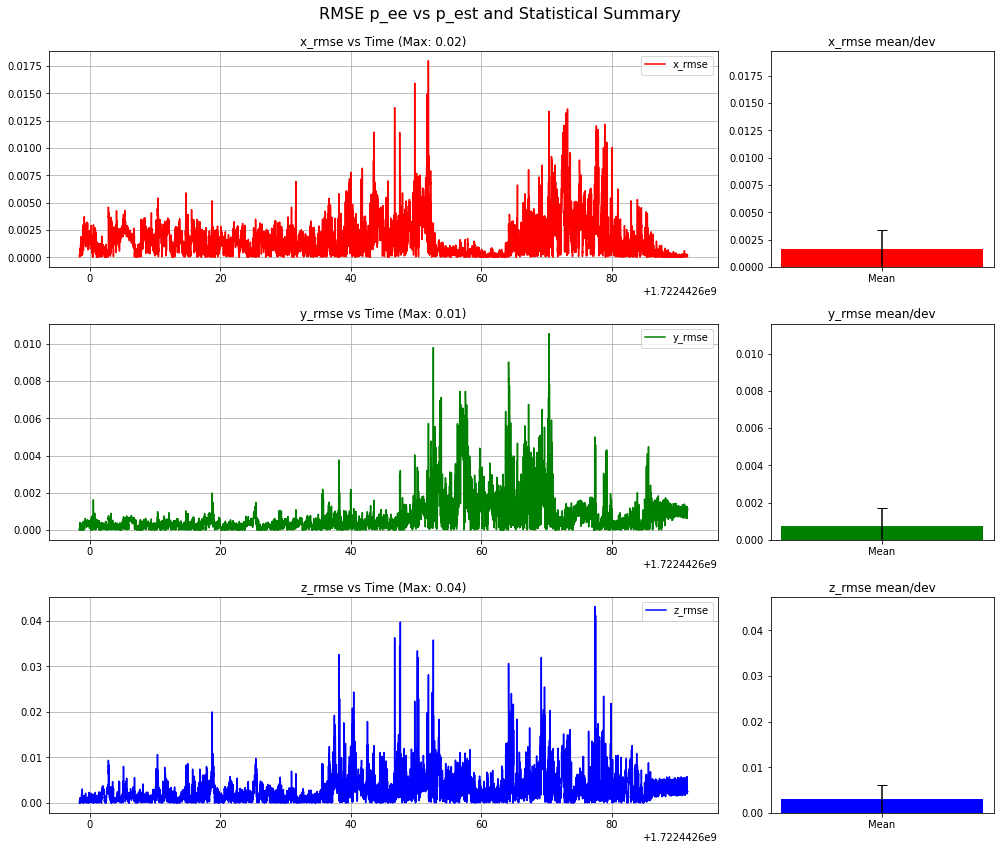

In [196]:
bag = bagreader('./bags/hand_mocap_comparison_opti.bag')
pose_ee = bag.message_by_topic('/mocap_helper/opt_ee_pose')
pose_uav = bag.message_by_topic('/mocap_helper/opt_elios_pose')
df_ee = pd.read_csv(pose_ee)
x_ee, y_ee, z_ee, qx_ee, qy_ee, qz_ee, qw_ee = extract_odom(df_ee)
x_est, y_est, z_est = get_est(T_uav, T_calib)

x_rmse = rmse(x_ee, x_est)
y_rmse = rmse(y_ee, y_est)
z_rmse = rmse(z_ee, z_est)

x_d = er_diff(x_ee, x_est)
y_d = er_diff(y_ee, y_est)
z_d = er_diff(z_ee, z_est)

#plot_err(df_ee, x_rmse, y_rmse, z_rmse)
#plot_err(df_ee, x_d, y_d, z_d)
plot_rmse_and_stats(df_ee, x_rmse, y_rmse, z_rmse)

In [192]:
def plot_err(df_ee, x_err, y_err, z_err): 
    # Create a figure with 3 subplots arranged in a 3x1 grid
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    n = 0
    # First subplot for x_rmse
    axs[0].plot(df_ee['Time'][n:], x_rmse, label='x_rmse', color='red')
    axs[0].set_title('x_rmse vs Time')
    axs[0].grid(True)
    axs[0].legend()

    # Second subplot for y_rmse
    axs[1].plot(df_ee['Time'][n:], y_rmse, label='y_rmse', color='green')
    axs[1].set_title('y_rmse vs Time')
    axs[1].grid(True)
    axs[1].legend()

    # Third subplot for z_rmse
    axs[2].plot(df_ee['Time'][n:], z_rmse, label='z_rmse', color='blue')
    axs[2].set_title('z_rmse vs Time')
    axs[2].grid(True)
    axs[2].legend()

## What can we compare and measure: 

- We can set 3 points that need to be inspected for certain time 
- We can then evaluate different approaches and controllers for inspection 

In [198]:
b0 = bagreader('./bags/flynav_test_uav.bag')
b1 = bagreader('./bags/flynav_test.bag')

[INFO]  Successfully created the data folder ./bags/flynav_test_uav.
[INFO]  Successfully created the data folder ./bags/flynav_test.


In [217]:
b0.topic_table

,Topics,Types,Message Count,Frequency
0,/flyanav/controller/command,elios_ros_msgs/AccelYawrateCommand,9998,45590.260870
1,/flynav/vio_odom,nav_msgs/Odometry,11232,97541.953488
2,/flynav/vio_yaw,std_msgs/Float64,10873,38479.853211
3,/kalman_scan2map_node/odometry_ros,nav_msgs/Odometry,842,9.996172
4,/pose_in,geometry_msgs/PoseStamped,2,0.153431
5,/sensors/imu,sensor_msgs/Imu,16702,127100.121212


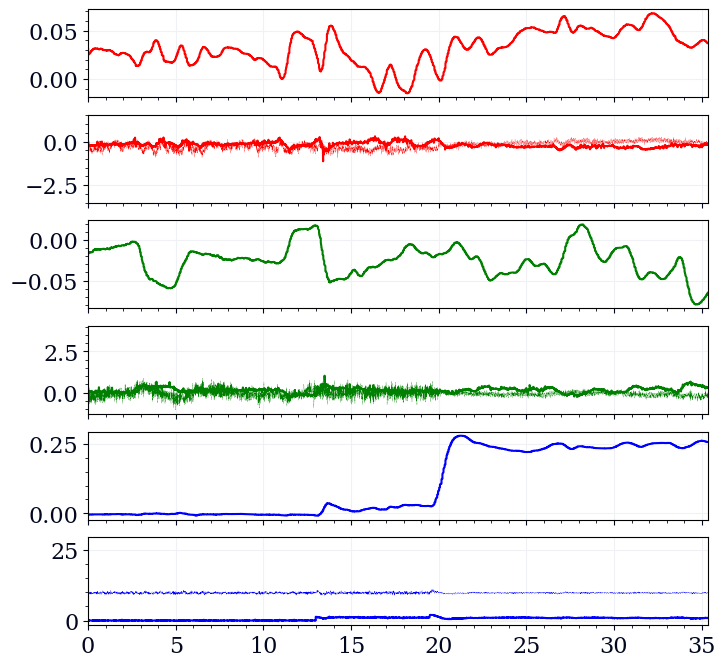

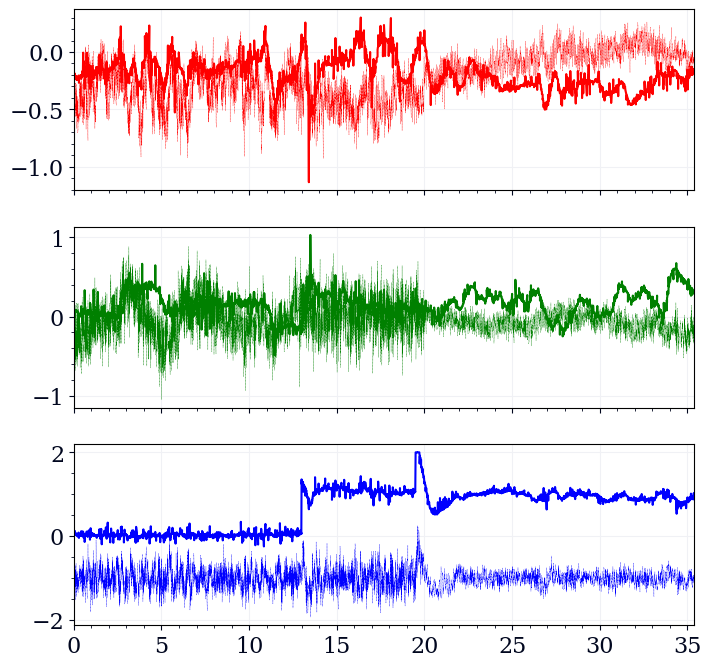

In [315]:
flyanav_cmd = b0.message_by_topic('/flyanav/controller/command')
odom_topic = b0.message_by_topic('/flynav/vio_odom')
imu = b0.message_by_topic('/sensors/imu')
df_f_cmd = pd.read_csv(flyanav_cmd)
df_uav = pd.read_csv(odom_topic)
df_imu = pd.read_csv(imu)
plot_pos_acc_imu(df_uav, df_f_cmd, df_imu, 40)
plot_acc(df_f_cmd, df_imu, 40)

In [300]:
print(df_imu['linear_acceleration.x'])
print(df_f_cmd['acceleration_semibody.x'])

0       -0.317314
1       -0.512647
2       -0.630367
3       -0.760366
4       -0.514593
           ...   
16697    0.156104
16698    0.156680
16699    0.131055
16700    0.126395
16701    0.136621
Name: linear_acceleration.x, Length: 16702, dtype: float64
0      -0.156424
1      -0.153183
2      -0.153906
3      -0.152182
4      -0.160026
          ...   
9993    0.000000
9994    0.000000
9995    0.000000
9996    0.000000
9997    0.000000
Name: acceleration_semibody.x, Length: 9998, dtype: float64


In [253]:
from scipy import signal

def extract_acc_cmd(df_acc_uav, t_end):
    t = df_acc_uav['Time']
    t = scale_time(t)
    ax = df_acc_uav['acceleration_semibody.x']
    ay = df_acc_uav['acceleration_semibody.y']
    az = df_acc_uav['acceleration_semibody.z']
    
    if t_end:
        it = find_closest_index(t, t_end); t = t[:it_]; ax=ax[:it_]; ay=ay[:it_]; az=az[:it_]
    
    return t, ax, ay, az
        
    

4929
